# WeatherPy

Trend 1: As you near the equator, temperatures generally increase. However, between latitudes 0 and 40, temperatures are currently higher because the Northern hemisphere is in Summer season. Temperatures between 0 and -40 are lower because the Southern hemisphere is currently in Winter season.

Trend 2: During Summer season, the Northern hemisphere is generally more humid than the Southern hemisphere.

Trend 3: During Summer season, cities in the Northern hemisphere tend to be more cloudy than those in the Southern hemisphere.


In [19]:
#!pip install citipy

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

## Perform API Calls

In [22]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL and save config information
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Set-up lists to hold response data
lat = []
lng = []
cloud = []
country = []
date = []
humidity = []
maxTemp = []
wind = []

In [23]:
# Create dataframe and columns to store city weather conditions
cityWeatherDF = pd.DataFrame({"City": cities})                       
cityWeatherDF["Cloudiness"] = ""
cityWeatherDF["Country"] = ""
cityWeatherDF["Date"] = ""
cityWeatherDF["Humidity"] = "" 
cityWeatherDF["Latitude"] = ""
cityWeatherDF["Longitude"] = ""
cityWeatherDF["Max Temp"] = ""
cityWeatherDF["Wind Speed"] = ""
#cityWeatherDF.head()

In [24]:
# Loop through all cities to capture data
for index, row in cityWeatherDF.iterrows():
    
    # Incorporate exception handling to skip cities that are missing a data point.
    try:
    
        # Get city name from cityWeatherDF 
        city = row["City"]
    
        # Assemble URL and make API request for each city
        response = requests.get(query_url + city).json()
    
        # Get specific column data 
        cloud = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        maxTemp = response['main']['temp_max']
        wind = response['wind']['speed']
        
        # Add row information to the city weather dataframe
        cityWeatherDF.at[index, 'Cloudiness'] = cloud
        cityWeatherDF.at[index, 'Country'] = country
        cityWeatherDF.at[index, 'Date'] = date
        cityWeatherDF.at[index, 'Humidity'] = humidity
        cityWeatherDF.at[index, 'Latitude'] = lat
        cityWeatherDF.at[index, 'Longitude'] = lng
        cityWeatherDF.at[index, 'Max Temp'] = maxTemp
        cityWeatherDF.at[index, 'Wind Speed'] = wind
        print(f"Processing Record {index} | {city}\n {query_url}")
        
    # Skip cities with missing data point and continue looping
    except (KeyError, IndexError) as error:
        print(f"Processing Record {index} | {city}")
        print(f"{city} Missing field/result... skipping.") 
        pass 
 
 # Print dataframe
cityWeatherDF.head()



Processing Record 0 | mutis
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 1 | carnarvon
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 2 | barentsburg
barentsburg Missing field/result... skipping.
Processing Record 3 | punta arenas
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 4 | khatanga
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 5 | taolanaro
taolanaro Missing field/result... skipping.
Processing Record 6 | upington
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 7 | nikolskoye
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 8 | fe

Processing Record 64 | kavaratti
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 65 | pori
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 66 | high level
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 67 | nueva helvecia
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 68 | hofn
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 69 | bethel
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 70 | saskylakh
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 71 | san vicente
 http:

Processing Record 125 | laguna
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 126 | castro
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 127 | honolulu
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 128 | maghama
maghama Missing field/result... skipping.
Processing Record 129 | abeche
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 130 | souillac
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 131 | manavalakurichi
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 132 | solnechnyy
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8

Processing Record 189 | nata
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 190 | buin
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 191 | coahuayana
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 192 | caucaia
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 193 | jadu
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 194 | eirunepe
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 195 | santander
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 196 | avarua
 http://api.o

Processing Record 251 | grand river south east
grand river south east Missing field/result... skipping.
Processing Record 252 | uusikaupunki
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 253 | bela
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 254 | rawannawi
rawannawi Missing field/result... skipping.
Processing Record 255 | oshikango
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 256 | bisira
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 257 | fare
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 258 | bonavista
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperi

Processing Record 315 | shingu
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 316 | gambela
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 317 | opuwo
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 318 | pisco
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 319 | kahului
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 320 | cururupu
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 321 | ballina
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 322 | vagur
 http://api.ope

Processing Record 377 | khani
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 378 | puerto el triunfo
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 379 | havoysund
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 380 | saint-ambroise
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 381 | basdiot
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 382 | shaunavon
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 383 | stokmarknes
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 

Processing Record 438 | sandwick
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 439 | ko samui
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 440 | taoudenni
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 441 | katsuura
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 442 | maniitsoq
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 443 | saryshagan
saryshagan Missing field/result... skipping.
Processing Record 444 | roald
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 445 | hambantota
 http://api.openweathermap.org/data/2.5/weather?appid=4d64

Processing Record 500 | arman
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 501 | ca mau
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 502 | manokwari
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 503 | nemuro
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 504 | petropavlovsk-kamchatskiy
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 505 | mercedes
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 506 | paris
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 507 | al

Processing Record 565 | dobeln
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 566 | hirado
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 567 | sindor
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 568 | alibag
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 569 | nishihara
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 570 | high river
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 571 | trabzon
 http://api.openweathermap.org/data/2.5/weather?appid=4d6490f8b36e9f48b8ea47f778f07ac8&units=imperial&q=
Processing Record 572 | maceio
 http://a

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,mutis,68,CO,1530982171,100,6.23,-77.4,78.12,3.94
1,carnarvon,0,ZA,1530982171,58,-30.97,22.13,35.82,6.51
2,barentsburg,,,,,,,,
3,punta arenas,40,CL,1530979200,100,-53.16,-70.91,33.8,9.17
4,khatanga,80,RU,1530982171,63,71.98,102.47,49.5,7.4


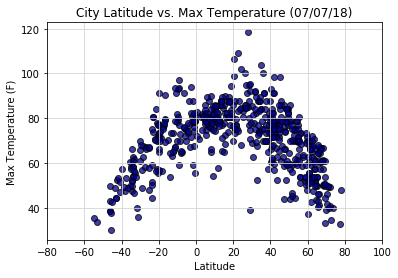

In [25]:
# Temperature (F) vs. Latitude

# Convert column objects to numeric/float data type
cityWeatherDF["Latitude"] = pd.to_numeric(cityWeatherDF["Latitude"])
cityWeatherDF["Max Temp"] = pd.to_numeric(cityWeatherDF["Max Temp"])
cityWeatherDF["Humidity"] = pd.to_numeric(cityWeatherDF["Humidity"])
cityWeatherDF["Cloudiness"] = pd.to_numeric(cityWeatherDF["Cloudiness"])
cityWeatherDF["Wind Speed"] = pd.to_numeric(cityWeatherDF["Wind Speed"])
#print(cityWeatherDF.dtypes)

# Create the scatter plot, legend and axes titles
plt.scatter(cityWeatherDF["Latitude"], cityWeatherDF["Max Temp"], facecolors="darkblue", edgecolors="black",  alpha=0.75)

plt.title("City Latitude vs. Max Temperature (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.grid(color = "lightgrey")
plt.savefig("Images/Temperature.png")
plt.show()

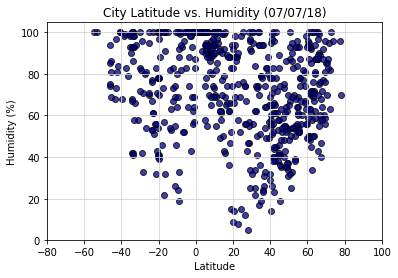

In [26]:
# Humidity (%) vs. Latitude

# Create the scatter plot, legend and axes titles
plt.scatter(cityWeatherDF["Latitude"], cityWeatherDF["Humidity"], facecolors="darkblue", edgecolors="black",  alpha=0.75)

plt.title("City Latitude vs. Humidity (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.grid(color = "lightgrey")
plt.savefig("Images/Humidity.png")
plt.show()


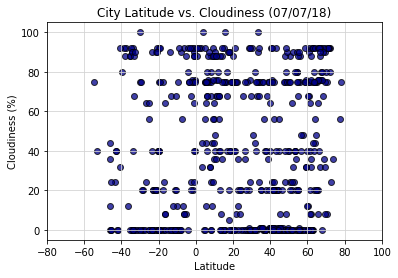

In [27]:
# Cloudiness (%) vs. Latitude

# Create the scatter plot, legend and axes titles
plt.scatter(cityWeatherDF["Latitude"], cityWeatherDF["Cloudiness"], facecolors="darkblue", edgecolors="black",  alpha=0.75)

plt.title("City Latitude vs. Cloudiness (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.grid(color = "lightgrey")
plt.savefig("Images/Cloudiness.png")
plt.show()


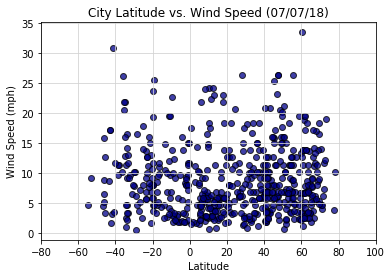

In [28]:
# Wind Speed (mph) vs. Latitude

# Create the scatter plot, legend and axes titles
plt.scatter(cityWeatherDF["Latitude"], cityWeatherDF["Wind Speed"], facecolors="darkblue", edgecolors="black",  alpha=0.75)

plt.title("City Latitude vs. Wind Speed (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.grid(color = "lightgrey")
plt.savefig("Images/Wind Speed.png")
plt.show()